In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
import keras

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [30]:
#data = pd.read_csv("~/datacsv/Churn_Modelling.csv")
data = pd.read_csv("~/datacsv/cchurn1.csv")

In [31]:
data

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7039,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,7040,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,7041,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,7042,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7032 non-null   int64  
 1   customerID        7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


In [33]:
data.shape

(7032, 22)

In [35]:
#data.isnull().sum()

In [7]:
#data1=data.dropna()

In [36]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [37]:
x = data.iloc[:,[6,19,20]].values
y=data.iloc[:,21].values

In [38]:
x

array([[1.0000e+00, 2.9850e+01, 2.9850e+01],
       [3.4000e+01, 5.6950e+01, 1.8895e+03],
       [2.0000e+00, 5.3850e+01, 1.0815e+02],
       ...,
       [1.1000e+01, 2.9600e+01, 3.4645e+02],
       [4.0000e+00, 7.4400e+01, 3.0660e+02],
       [6.6000e+01, 1.0565e+02, 6.8445e+03]])

In [40]:
x.shape

(7032, 3)

In [39]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [41]:
# splitting the training & test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2)

In [42]:
x_train.shape ,x_test.shape, y_train.shape ,y_test.shape

((5625, 3), (1407, 3), (5625,), (1407,))

In [43]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()
x_train1 = mc.fit_transform( x_train)
X_test1 = mc.fit_transform( x_test)

In [44]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [15]:
# Initialize the model
model=Sequential()

# Build input layer 
model.add(Dense(units=12, activation='relu', input_dim=3))

In [16]:
# Building hidden layer
model.add(Dense(units=6,activation ='relu'))

In [ ]:
# Building hidden layer
model.add(Dense(units=3,activation ='relu'))

In [17]:
#Adding outer layer
model.add(Dense(units=1, activation='sigmoid'))

In [18]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [19]:
#model.fit(x_train, y_train, epochs=50, batch_size=1,verbose=1)

from tensorflow.keras.callbacks import EarlyStopping
early_stopping_minitor = EarlyStopping(patience=100)

#train model:   
history = model.fit(x_train, y_train,
 epochs=150,
 batch_size=10,
 #validation_split=0.2,
 callbacks=[early_stopping_minitor])

Epoch 1/150
800/800 [==============================] - 1s 668us/step - loss: 664.1093 - accuracy: 0.6889
Epoch 2/150
800/800 [==============================] - 1s 660us/step - loss: 117.3948 - accuracy: 0.6685
Epoch 3/150
800/800 [==============================] - 1s 659us/step - loss: 89.1094 - accuracy: 0.6681
Epoch 4/150
800/800 [==============================] - 1s 664us/step - loss: 107.8563 - accuracy: 0.6737
Epoch 5/150
800/800 [==============================] - 1s 654us/step - loss: 85.8341 - accuracy: 0.6750
Epoch 6/150
800/800 [==============================] - 1s 659us/step - loss: 85.2180 - accuracy: 0.6705
Epoch 7/150
800/800 [==============================] - 1s 664us/step - loss: 90.6459 - accuracy: 0.6701
Epoch 8/150
800/800 [==============================] - 1s 653us/step - loss: 72.2676 - accuracy: 0.6694
Epoch 9/150
800/800 [==============================] - 1s 652us/step - loss: 75.0230 - accuracy: 0.6716
Epoch 10/150
800/800 [==============================] - 1s 65

In [20]:
# fit model 
#model.fit(x_train,y_train,epochs=150)

In [21]:
y_pred = model.predict(x_test)


63/63 [==============================] - 0s 501us/step


In [22]:
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


In [23]:
cmatrix = confusion_matrix(y_test, y_pred)
print(cmatrix)
accuracy_score(y_test, y_pred)

[[1603    0]
 [ 397    0]]


0.8015

In [24]:
print('Test accuracy:', accuracy_score(y_test, y_pred))

Test accuracy: 0.8015


dict_keys(['loss', 'accuracy'])


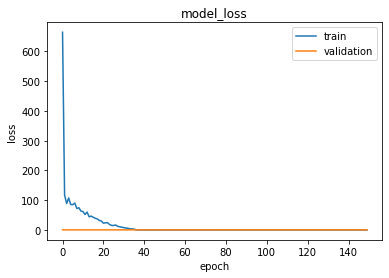

In [25]:
# Plot loss of train and test set
print(history.history.keys())

#Loss in train and test:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()